Mounted at /content/drive
Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.3982 - loss: 1.3335 - val_accuracy: 0.6667 - val_loss: 0.9704
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 819ms/step - accuracy: 0.5886 - loss: 0.9735 - val_accuracy: 0.7917 - val_loss: 0.6502
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 553ms/step - accuracy: 0.5783 - loss: 0.8231 - val_accuracy: 0.7500 - val_loss: 0.5045
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 689ms/step - accuracy: 0.8035 - loss: 0.5444 - val_accuracy: 0.9167 - val_loss: 0.3670
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 617ms/step - accuracy: 0.6086 - loss: 0.8682 - val_accuracy: 0.8333 - val_loss: 0.3889
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 597ms/step - accuracy: 0.7926 - loss: 0.5167 - val_accuracy: 0.8750 - val_loss: 0.3655
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 696ms/step - accuracy: 0.8529 - loss: 0.3848 - val_accuracy: 0.7917 - val_loss: 0.5658
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 548ms/step - accuracy: 0.9001 - loss: 0.2713 - val_accuracy: 0.8

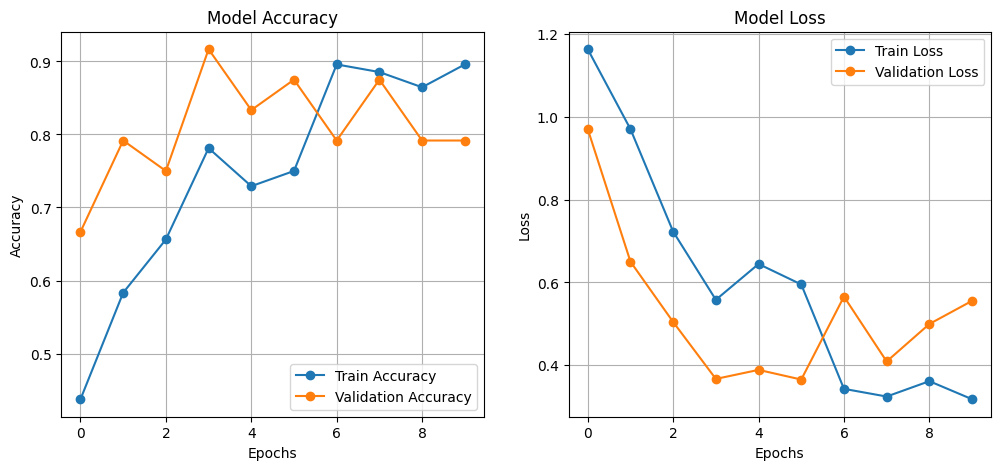

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step


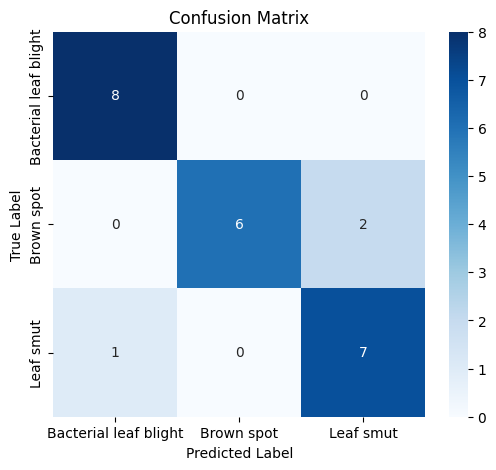

Classification Report:
                        precision    recall  f1-score   support

Bacterial leaf blight       0.89      1.00      0.94         8
           Brown spot       1.00      0.75      0.86         8
            Leaf smut       0.78      0.88      0.82         8

             accuracy                           0.88        24
            macro avg       0.89      0.88      0.87        24
         weighted avg       0.89      0.88      0.87        24

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


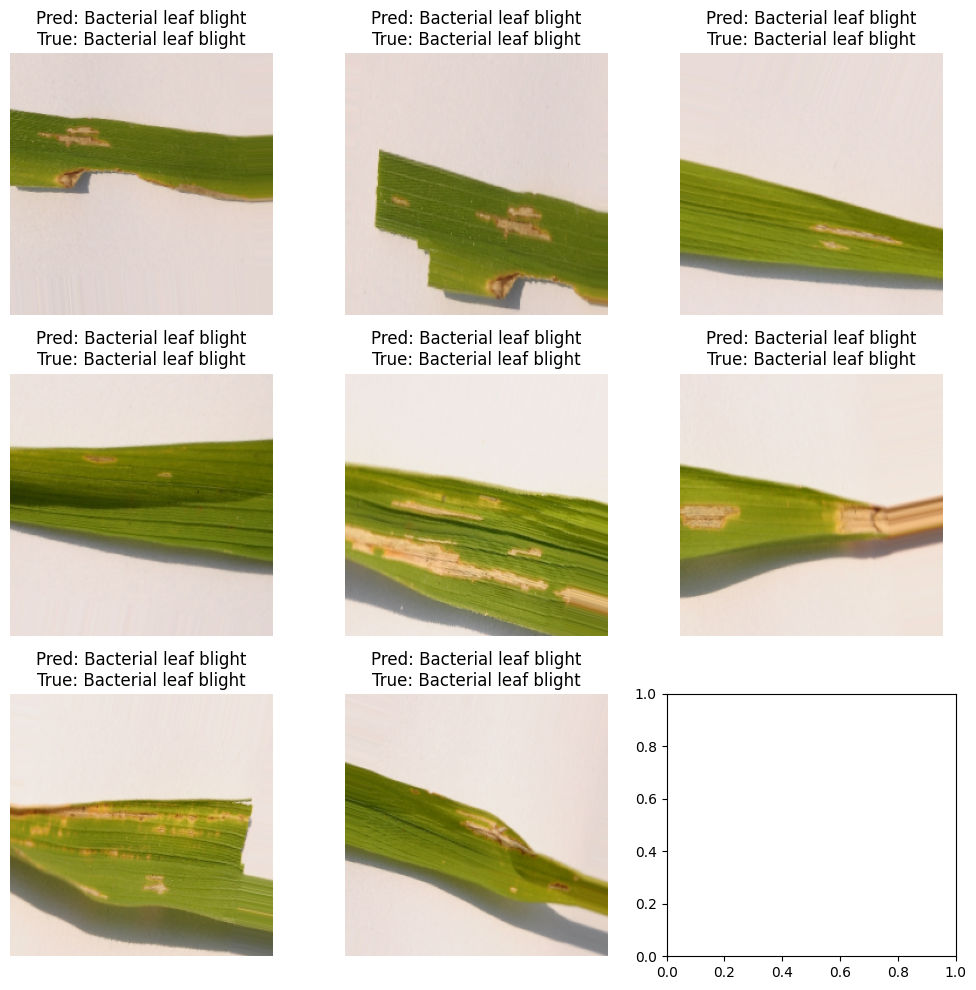

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Dataset Path
data_dir = '/content/drive/My Drive/rice_leaf_diseases'

# ✅ Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Needed for correct confusion matrix
)

# ✅ Load MobileNetV2 (Pretrained)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# ✅ Correct Model Definition
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dense(3, activation='softmax')(x)  # 3 classes
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train Model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# ✅ Save Model
model.save('/content/drive/My Drive/rice_leaf_disease_model.keras', save_format="keras")

# ✅ Training Accuracy & Loss Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

# ✅ Confusion Matrix
y_true = val_gen.classes  # True labels
y_pred = model.predict(val_gen)  # Predictions
y_pred_classes = np.argmax(y_pred, axis=1)

class_labels = list(val_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ✅ Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

# ✅ Sample Predictions Visualization
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for i, (img, label) in enumerate(zip(val_gen[0][0][:9], val_gen[0][1][:9])):  # Iterate through images and labels
    pred_idx = np.argmax(model.predict(np.expand_dims(img, axis=0)))
    true_idx = np.argmax(label) # Get the index of the true label
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f"Pred: {class_labels[pred_idx]}\nTrue: {class_labels[true_idx]}")
    ax.axis("off")
plt.tight_layout()
plt.show()
